In [1]:
r=[190799, 209960, 190825, 209986, 209880, 158684, 209933, 209986, 209854, 209907, 158655, 209960]

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ZIYAD\Desktop\IOT project\TRRR\trafficData02112014.csv")
df

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324
...,...,...,...,...,...,...,...,...,...
25097088,OK,1798,2,623,1798,2014-11-13T10:20:00,0,32507360,210199
25097089,OK,1798,2,623,1798,2014-11-13T10:30:00,0,32507801,210199
25097090,OK,1798,2,623,1798,2014-11-13T10:35:00,0,32508244,210199
25097091,OK,1798,2,623,1798,2014-11-13T10:40:00,0,32508648,210199


In [4]:
df1=pd.DataFrame(df[df['REPORT_ID'].isin(r)]).reset_index()
df1

,index,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,340605,OK,217,111,896,217,2014-02-13T11:30:00,12,190228,158655
1,340606,OK,226,106,896,226,2014-02-13T11:35:00,12,190677,158655
2,340607,OK,227,106,896,227,2014-02-13T11:40:00,11,191126,158655
3,340608,OK,219,110,896,219,2014-02-13T11:45:00,12,191575,158655
4,340609,OK,207,116,896,207,2014-02-13T11:50:00,10,192024,158655
...,...,...,...,...,...,...,...,...,...,...
552019,25018675,OK,118,80,985,118,2014-11-13T10:20:00,0,32507714,209986
552020,25018676,OK,118,80,985,118,2014-11-13T10:25:00,0,32508163,209986
552021,25018677,OK,118,80,985,118,2014-11-13T10:30:00,0,32508564,209986
552022,25018678,OK,118,80,985,118,2014-11-13T10:35:00,0,32508999,209986


In [5]:
dfr=[]
for r in df1['REPORT_ID'].unique():
    dfr.append(df1[df1['REPORT_ID']==r])

#make sure that all the dataframes in dfr have the same TIMESTAMP
for i in range(len(dfr)):
    print(dfr[i]['TIMESTAMP'].unique())
    








#for r in df1['REPORT_ID'].unique():
#    df1[df1['REPORT_ID']==r]['TIMESTAMP']

['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:30:00' '2014-11-13T10:35:00' '2014-11-13T10:40:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:30:00' '2014-11-13T10:35:00' '2014-11-13T10:40:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:30:00' '2014-11-13T10:35:00' '2014-11-13T10:40:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:30:00' '2014-11-13T10:35:00' '2014-11-13T10:40:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:35:00' '2014-11-13T10:40:00' '2014-11-13T10:45:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:35:00' '2014-11-13T10:40:00' '2014-11-13T10:45:00']
['2014-02-13T11:30:00' '2014-02-13T11:35:00' '2014-02-13T11:40:00' ...
 '2014-11-13T10:30:00' '2014-11-13T10:35:00' '2014-11-13T10:40:00']
['2014-02-13T11:30:00' '201

In [6]:
lr={}
l=list(df1['REPORT_ID'].unique())

r1=l.pop(0)

for r in l:
    lu=list(set(list(df1[df1['REPORT_ID']==r]['TIMESTAMP'])) & set(list(df1[df1['REPORT_ID']==r1]['TIMESTAMP'])))

    #lr[r]=list(df1[df1['REPORT_ID']==r]['TIMESTAMP'])

print(len(lu))



52075


In [7]:
df1[df1['TIMESTAMP'].isin(lu)]

,index,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,340605,OK,217,111,896,217,2014-02-13T11:30:00,12,190228,158655
1,340606,OK,226,106,896,226,2014-02-13T11:35:00,12,190677,158655
2,340607,OK,227,106,896,227,2014-02-13T11:40:00,11,191126,158655
3,340608,OK,219,110,896,219,2014-02-13T11:45:00,12,191575,158655
4,340609,OK,207,116,896,207,2014-02-13T11:50:00,10,192024,158655
...,...,...,...,...,...,...,...,...,...,...
552019,25018675,OK,118,80,985,118,2014-11-13T10:20:00,0,32507714,209986
552020,25018676,OK,118,80,985,118,2014-11-13T10:25:00,0,32508163,209986
552021,25018677,OK,118,80,985,118,2014-11-13T10:30:00,0,32508564,209986
552022,25018678,OK,118,80,985,118,2014-11-13T10:35:00,0,32508999,209986


In [8]:
for d in dfr:
    print(len(d))

54763
52489
56313
54621
58311
57608
56161
55234
53925
52599


In [9]:
df1.drop(columns=['extID','_id','status','medianMeasuredTime','index'],inplace=True)

In [10]:
t=df1.pop('TIMESTAMP')

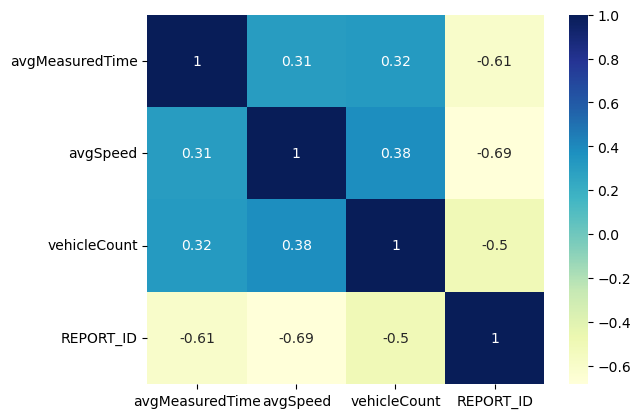

In [11]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [15]:
df.drop(columns=['extID','_id','status','medianMeasuredTime'],inplace=True)
at=df.pop('TIMESTAMP')

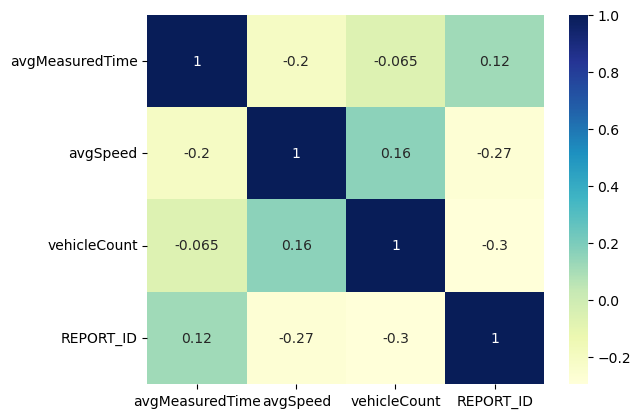

In [16]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()